In [2]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
warnings.filterwarnings("ignore")
%time

CPU times: user 4 μs, sys: 1e+03 ns, total: 5 μs
Wall time: 8.11 μs


In [3]:
df=pd.read_csv('/Users/avinashmagar/Documents/DataScience/python/Dataset/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.shape

(569, 32)

In [6]:
df.size

18208

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop_duplicates()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

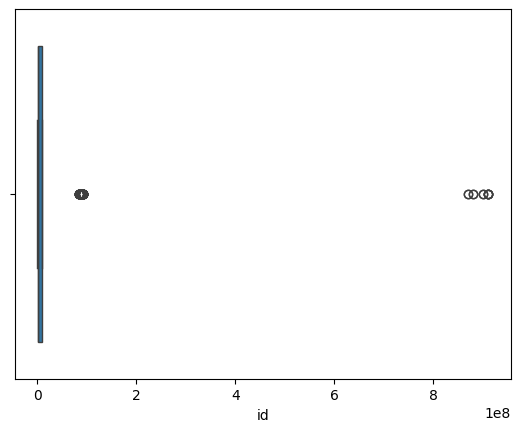

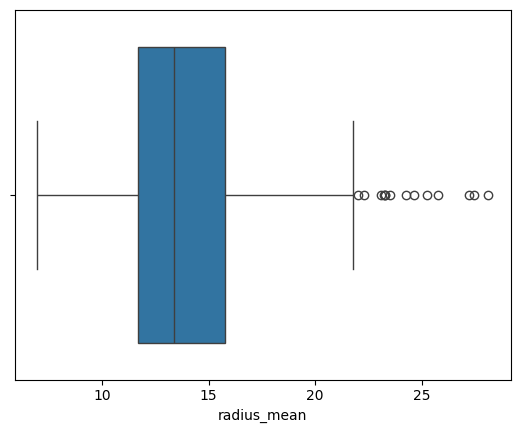

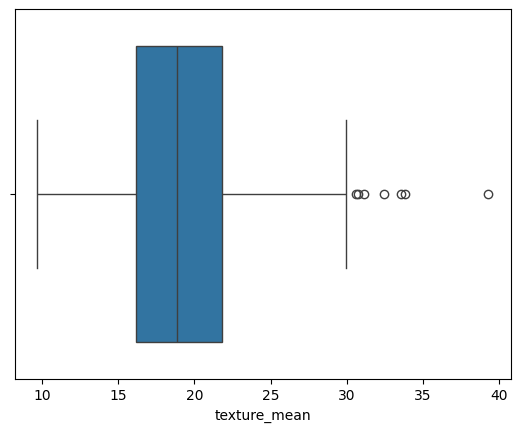

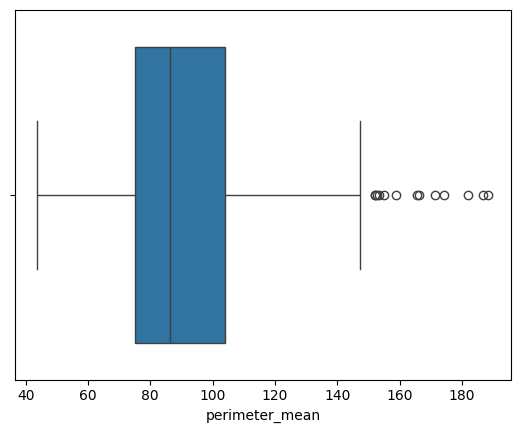

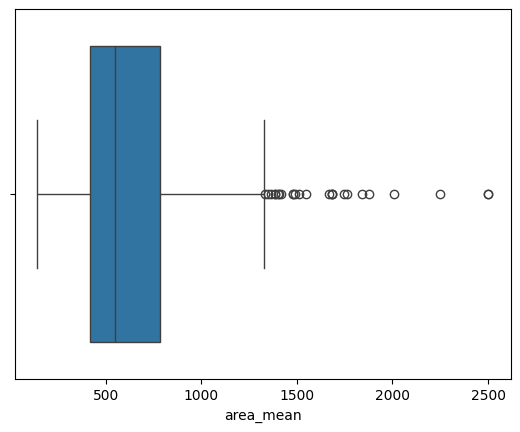

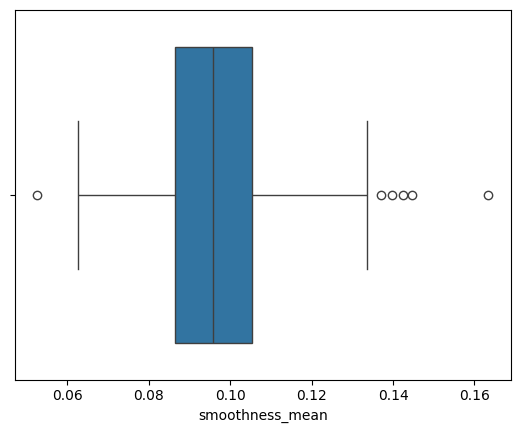

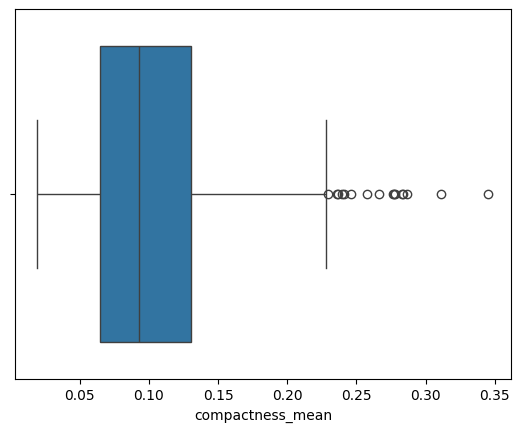

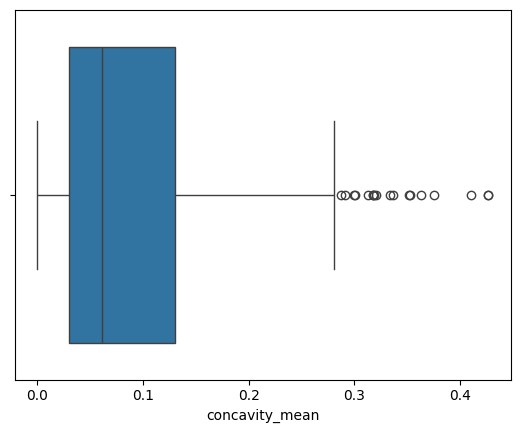

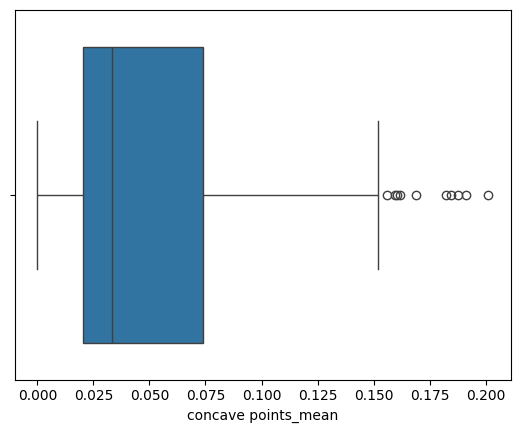

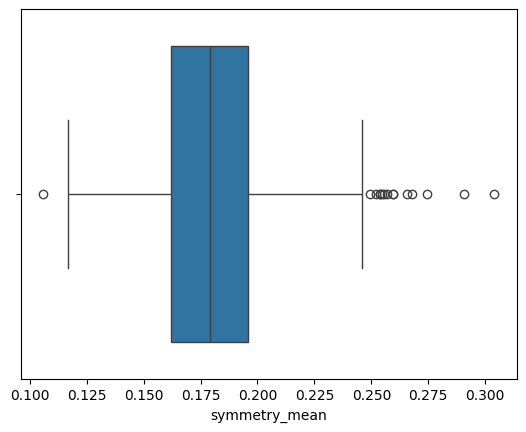

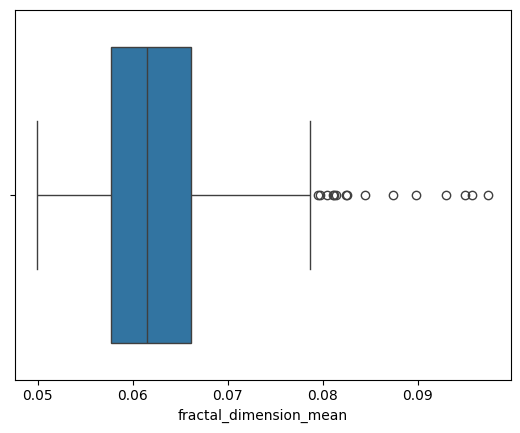

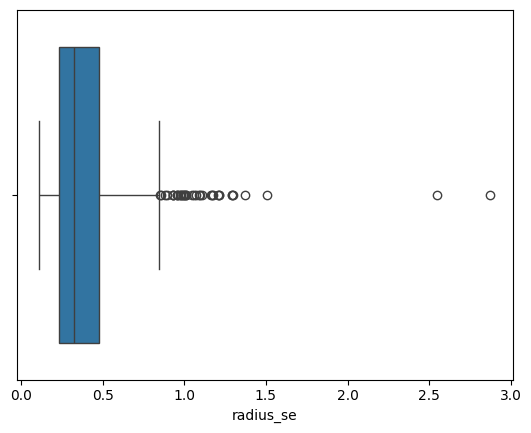

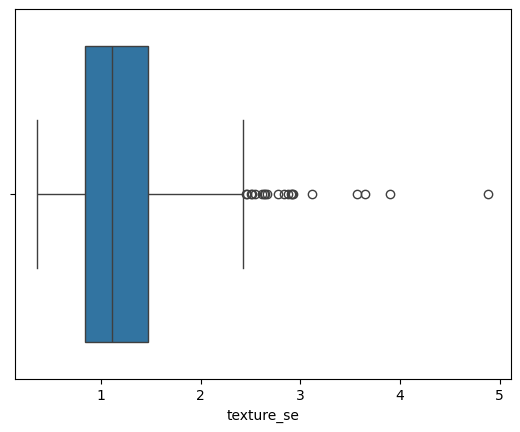

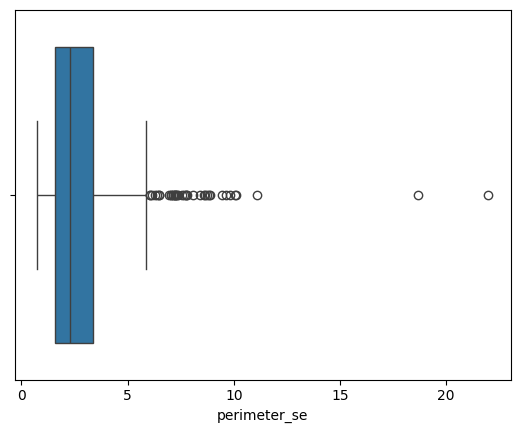

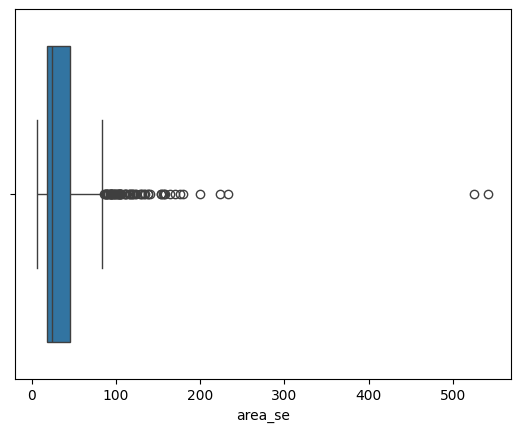

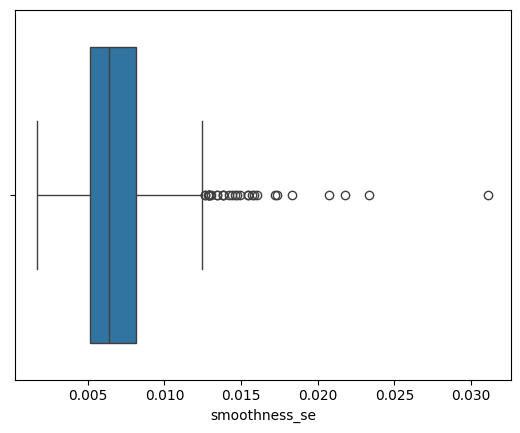

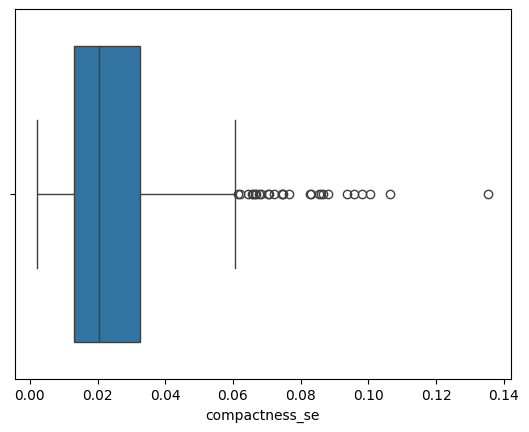

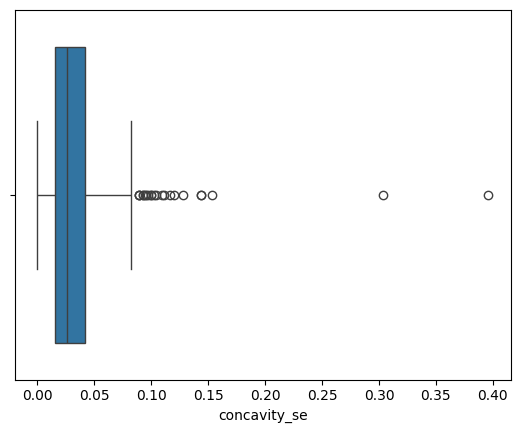

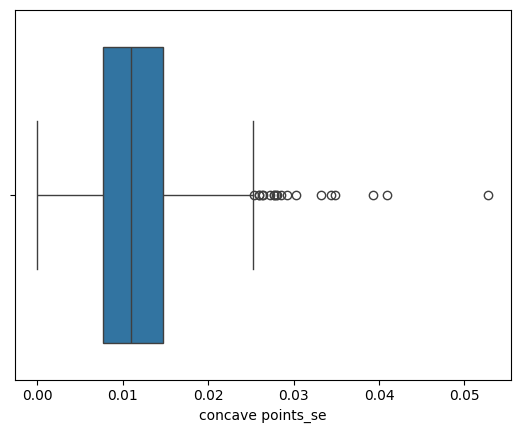

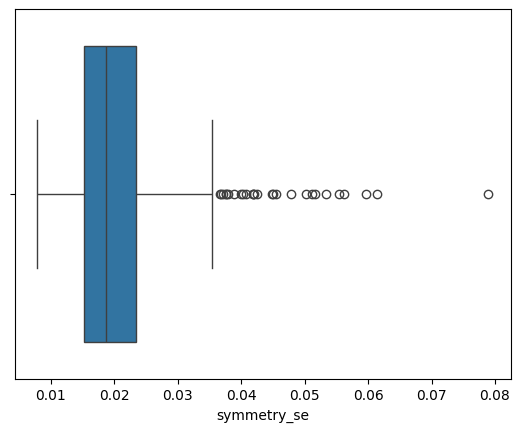

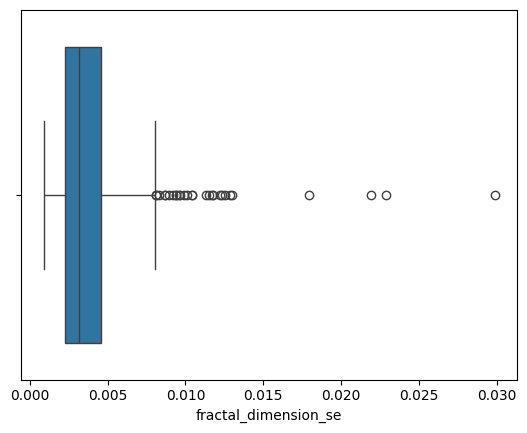

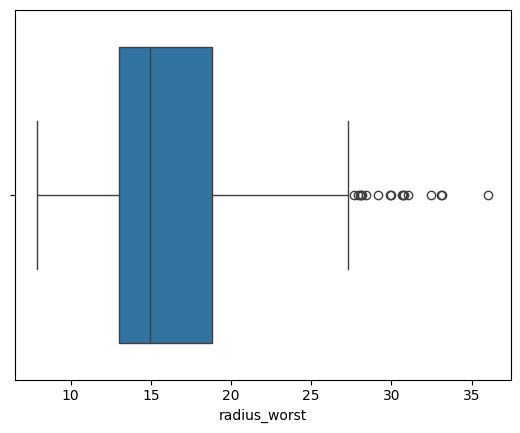

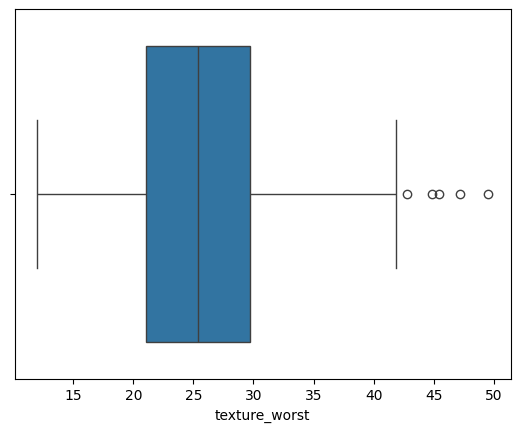

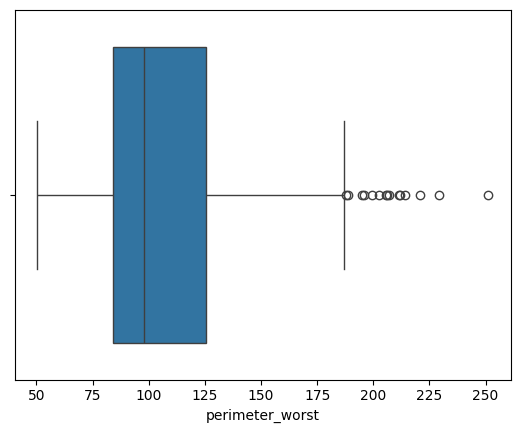

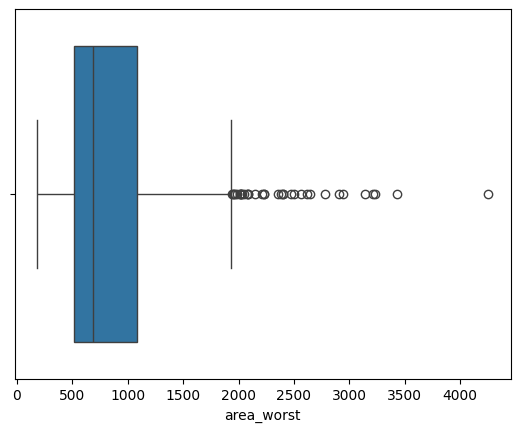

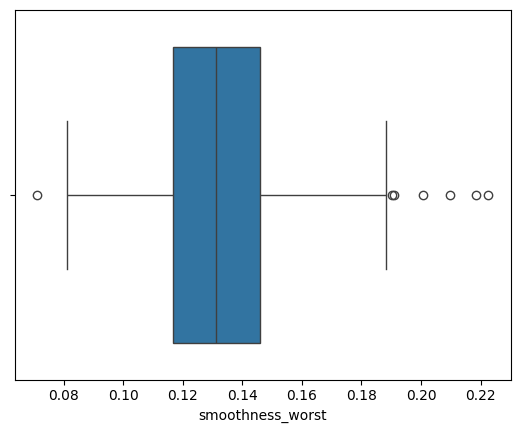

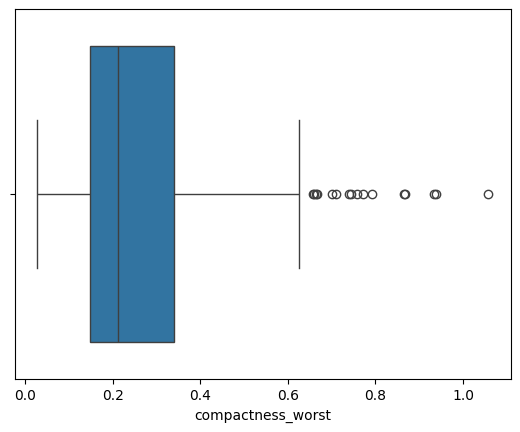

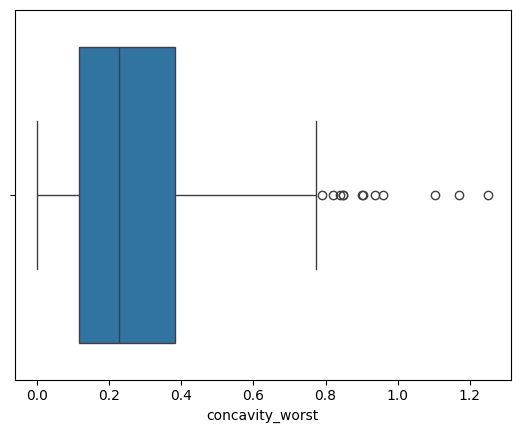

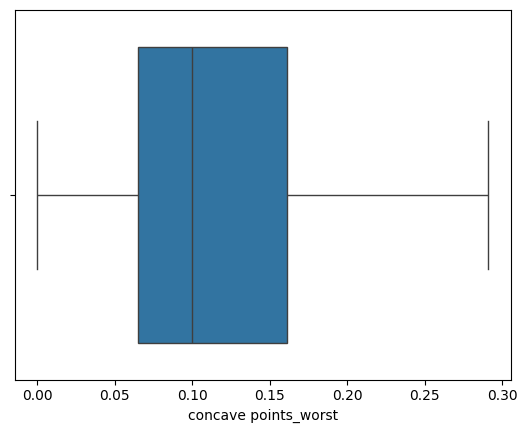

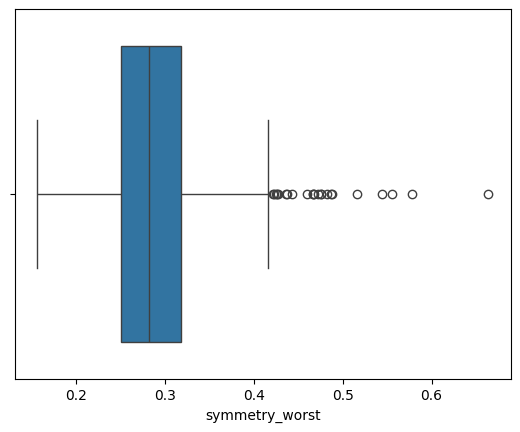

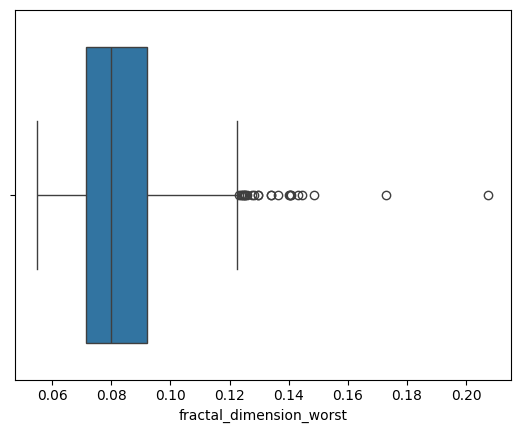

In [13]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])        
    plt.show()

In [14]:
q1 = df['fractal_dimension_worst'].quantile(0.25)
q3 = df['fractal_dimension_worst'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['fractal_dimension_worst'] = df['fractal_dimension_worst'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(0.12301), np.float64(0.04053))

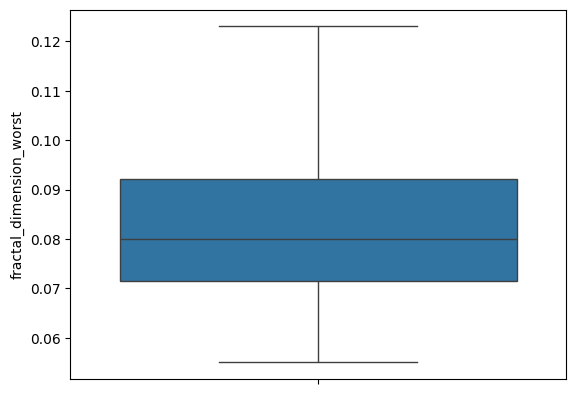

In [15]:
sns.boxplot(df['fractal_dimension_worst'])
plt.show()

In [16]:
q1 = df['concave points_worst'].quantile(0.25)
q3 = df['concave points_worst'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['concave points_worst'] = df['concave points_worst'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(0.30610499999999996), np.float64(-0.07977499999999997))

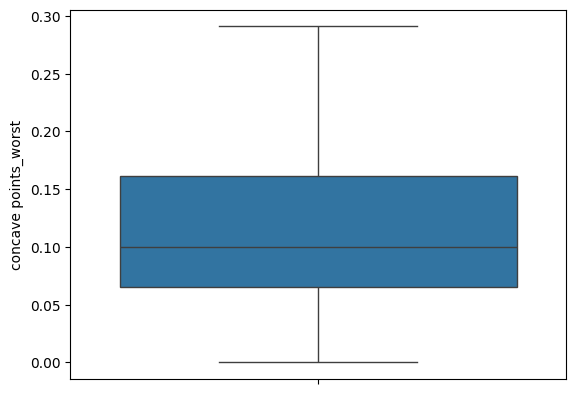

In [17]:
sns.boxplot(df['concave points_worst'])
plt.show()

In [ ]:
def clip_outliers(df):       #holl data sets clip
    for col in df.select_dtypes(include=np.number):  # Apply only to numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

# Apply the function
df11 = clip_outliers(df)

print(df11)

             id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302.0         M        17.99         10.38          122.80   
1      842517.0         M        20.57         17.77          132.90   
2    20728995.5         M        19.69         21.25          130.00   
3    20728995.5         M        11.42         20.38           77.58   
4    20728995.5         M        20.29         14.34          135.10   
..          ...       ...          ...           ...             ...   
564    926424.0         M        21.56         22.39          142.00   
565    926682.0         M        20.13         28.25          131.20   
566    926954.0         M        16.60         28.08          108.30   
567    927241.0         M        20.60         29.33          140.10   
568     92751.0         B         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0         0.118400           0.22862         0.28241 

Data Visualization

In [19]:
#sns.pairplot(df)
#plt.show()
#time 

In [20]:
#plt.figure(figsize=[20,15])
#sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
%time

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 3.81 μs


<Axes: xlabel='radius_mean', ylabel='area_mean'>

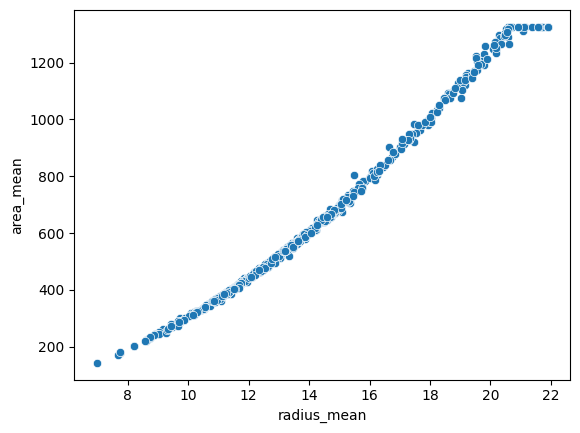

In [21]:
sns.scatterplot(x=df['radius_mean'],y=df['area_mean'])

In [22]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
df_sc=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
df_sc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.602924,1.297676,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,...,2.006477,-1.375159,2.439568,2.287627,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247
1,-0.602894,1.297676,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,...,1.921384,-0.370048,1.631542,2.287627,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314
2,2.212145,1.297676,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,...,1.611558,-0.019582,1.434234,1.807751,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197
3,2.212145,1.297676,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,...,-0.277945,0.140773,-0.245395,-0.593838,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456
4,2.212145,1.297676,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,...,1.386825,-1.484267,1.424838,1.525780,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683


In [24]:
from sklearn.decomposition import PCA
pca=PCA(5)
model=pca.fit(df_sc)

print("Top 5 EigenValue:",model.explained_variance_)
print("\nTop 5 Eigenvectors:",model.components_)
print("Explaines variable by top 5 Components:",model.explained_variance_ratio_.sum()*100)

Top 5 EigenValue: [14.76896643  5.68584144  2.76039884  1.93309289  1.61893106]

Top 5 Eigenvectors: [[ 2.52154965e-02  2.16513329e-01  2.09578959e-01  1.04859551e-01
   2.17722977e-01  2.11274447e-01  1.33944219e-01  2.25932974e-01
   2.43762444e-01  2.48136709e-01  1.28551069e-01  5.43217207e-02
   2.01045021e-01  1.77820324e-02  2.09154705e-01  2.17556871e-01
   6.22023839e-03  1.67262292e-01  1.76466014e-01  1.83198204e-01
   1.58673234e-02  1.13246281e-01  2.20703341e-01  1.05516678e-01
   2.28028241e-01  2.20891999e-01  1.24189775e-01  2.07972721e-01
   2.22801915e-01  2.41724502e-01  1.19393280e-01  1.29733029e-01]
 [-3.65701168e-02 -8.55801902e-02 -2.31616023e-01 -5.76791332e-02
  -2.11648394e-01 -2.27839805e-01  1.98254238e-01  1.60645532e-01
   6.33820680e-02 -2.30488264e-02  1.92305181e-01  3.70941614e-01
  -7.82835286e-02  1.06016138e-01 -5.91764100e-02 -1.37848606e-01
   2.34880724e-01  2.30320783e-01  1.75752373e-01  1.22739231e-01
   1.89147047e-01  2.96935446e-01 -2.132

In [25]:
pca_model=PCA(n_components=0.95)
model_p=pca_model.fit(df_sc)

In [26]:
model_p.n_components_

np.int64(11)

In [27]:
df_pca=pd.DataFrame(model_p.fit_transform(df_sc))
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,9.278315,2.486938,-1.675900,-3.400248,1.276247,1.516727,-0.730622,1.745292,-0.133884,0.264306,-0.685529
1,3.151391,-4.268181,-0.493033,-1.374636,0.068034,-0.168898,-0.791713,0.917525,0.605676,0.233709,1.013684
2,6.850616,-1.262081,-0.177430,-0.959469,0.597900,0.861427,2.136554,-0.025038,0.171868,0.008141,-0.026021
3,5.781591,7.290964,-1.519834,0.400964,1.064048,1.185939,2.250691,-0.247176,0.233615,0.293182,-1.019110
4,5.079414,-2.057015,1.598240,-3.334842,0.030267,-1.399161,2.523711,-0.041375,1.110842,0.048536,0.679748


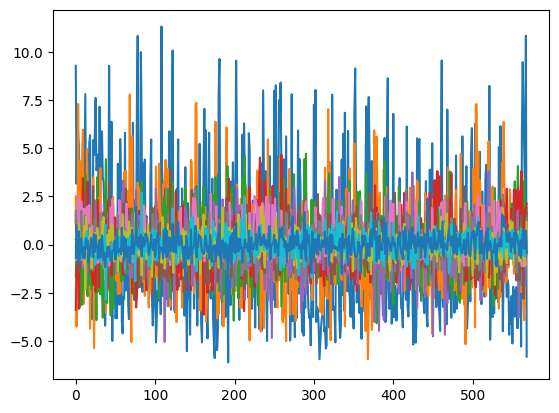

In [28]:
plt.plot(df_pca)

Find the optimal cluster value

In [29]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(2,12):
    Kmeans=KMeans(n_clusters=i,random_state=45)
    Kmeans.fit(df_sc)
    wcss.append(Kmeans.inertia_)
wcss
    

[11738.491386904938,
 10166.886453656029,
 9276.357845870087,
 8692.024874776886,
 8237.45085593721,
 7672.752596702171,
 7372.6493570255025,
 7145.084093878466,
 6929.238192121232,
 6749.123028334095]

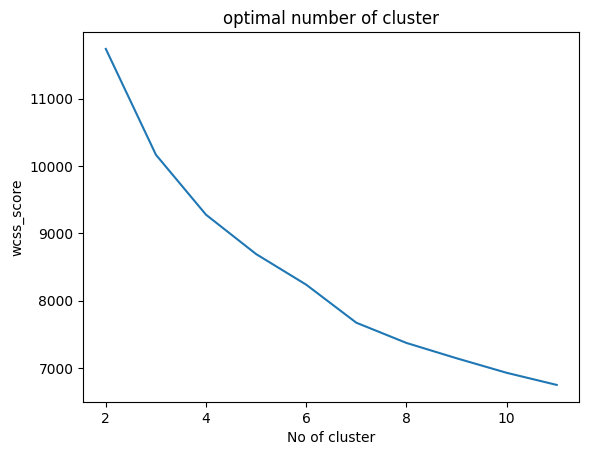

In [30]:
plt.plot(range(2,12),wcss)
plt.xlabel("No of cluster")
plt.ylabel("wcss_score")
plt.title("optimal number of cluster")
plt.tight_layout
plt.show()

In [31]:
from sklearn.cluster import KMeans

In [32]:
Kmeans=KMeans(2)
Kmeans.fit(df_pca)
print(Kmeans.labels_)

df_sc['cluster']=Kmeans.labels_

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

In [33]:
df_sc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'cluster'],
      dtype='object')

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

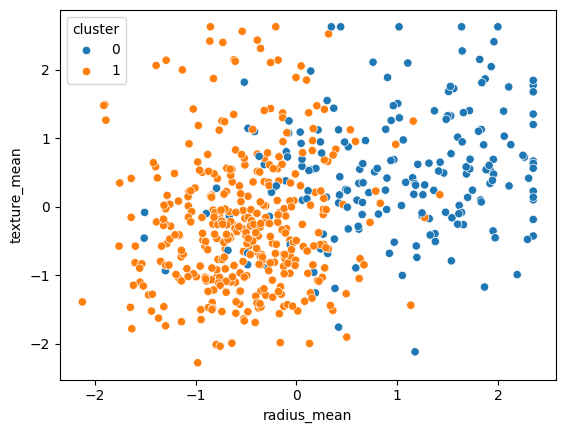

In [34]:
sns.scatterplot(x=df_sc['radius_mean'],y=df_sc['texture_mean'],hue=df_sc['cluster'])

Evaluate Clustering (Train Test Split)

In [ ]:
from sklearn.model_selection import train_test_split
x=df_sc.drop('cluster',axis=1)
y=df_sc['cluster']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=65)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=45)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=45)

In [37]:
from sklearn.metrics import classification_report
print('Train Data\n--------------')
train_pred=dt.predict(xtrain)
result=classification_report(ytrain,train_pred)
print(result)
print('Test Data\n--------------')
test_pred=dt.predict(xtest)
result=classification_report(ytest,test_pred)
print(result)


Train Data
--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       272

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Test Data
--------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.97      0.95      0.96       106

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

